In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

In [2]:
class_name = 'Occupancy'
df = pd.read_csv('dataset.csv', skipinitialspace=True, na_values='?', keep_default_na=True)

# lista che serve per il grafico con la ts alla fine
change_date = []
for i, x in enumerate(df['date']):
    hour = x.split()[1]
    if hour == "00:00:00":
        change_date.append(i)

columns2remove = ['date', 'Unnamed: 0', 'cumulative_hour', 'cumulative_minute', 'day', 'weekend', 'day_minute', 'minute', 'hour']
df.drop(columns2remove, inplace=True, axis=1)

attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

print(len(df))
df.head()


20560


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [3]:
from sklearn.preprocessing import StandardScaler


#Primo tipo di normalizzazione: Z-Score 
scaler = StandardScaler()
X = scaler.fit_transform(df[attributes].values)
y = df[class_name]

In [4]:
import sys
sys.path.append('./')

In [5]:
from data_preparation import prepare_dataset

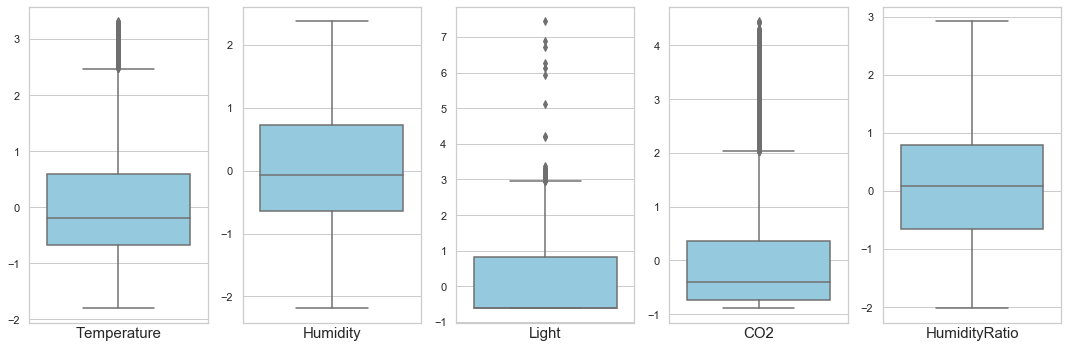

In [6]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 5))
fig_dims = (1, 5)
for i in range(5):
    plt.subplot2grid(fig_dims, (0,i))
    sns.boxplot(data=[X[:,i]], color = 'skyblue')
    plt.xticks([])
    plt.xlabel(attributes[i], fontsize=15)

plt.tight_layout()
plt.show()

# DBSCAN

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
dbscan = DBSCAN(eps=0.22, min_samples=10)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.22, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [9]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40], dtype=int64),
 array([ 206,  371,  129, 8722, 1782,   21,   26,   12,   11,   36,   16,
          21,   23,   62,  601,   22,   22, 1041,   23,   19, 5263,   32,
          24,   23,   20,   15,   25,  122,   20,  182,   76,  165,   37,
         266,   26,   80,   85,   25,   25,  268,   15,  600], dtype=int64))

In [10]:
df.loc[np.where(dbscan.labels_==-1)]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.700,26.2720,585.200000,749.200000,0.004764,1
1,23.718,26.2900,578.400000,760.400000,0.004773,1
2,23.730,26.2300,572.666667,769.666667,0.004765,1
5,23.760,26.2600,568.666667,790.000000,0.004779,1
6,23.730,26.2900,536.333333,798.000000,0.004776,1
...,...,...,...,...,...,...
20555,20.815,27.7175,429.750000,1505.250000,0.004213,1
20556,20.865,27.7450,423.500000,1514.500000,0.004230,1
20557,20.890,27.7450,423.500000,1521.500000,0.004237,1
20558,20.890,28.0225,418.750000,1632.000000,0.004279,1


# LOF

In [11]:
from sklearn.neighbors import LocalOutlierFactor

In [12]:
clf = LocalOutlierFactor(n_neighbors=25, contamination = 0.01005)
outliers_LOF = clf.fit_predict(X)

In [13]:
outliers_LOF

array([ 1,  1,  1, ..., -1, -1, -1])

In [14]:
np.unique(outliers_LOF, return_counts=True)

(array([-1,  1]), array([  207, 20353], dtype=int64))

In [15]:
#Array contenente le righe corrispondenti ai top 1% outliers secondo LOF
# Il numero -2.259430940105494 e' il valore corrispondente l'outlier "meno outlier" tra i top 1% selezionati
np.where(outliers_LOF == -1)

(array([  225,   816,   817,   833,   891,   901,   902,   906,   908,
          951,   952,   956,   972,   974,   975,   976,   977,   978,
          979,   980,   981,   982,   983,   984,   985,   987,  1037,
         2478,  2601,  2602,  2603,  3846,  4118,  4706,  4709,  4710,
         4750,  4755,  4789,  4797,  5205,  5247,  5271,  5854,  5903,
         5915,  5934,  5949,  5953,  5970,  5971,  6002,  6041,  6045,
         6122,  6142,  6170,  6171,  6201,  6238,  6384,  6495,  6496,
         6497,  6498,  7010,  7011,  7568,  7574,  7575,  7584,  8625,
         8627,  8630,  8638,  8677,  8755,  8904,  8962,  8968,  8972,
         8974,  8987,  9018,  9027,  9038,  9124,  9159,  9307,  9309,
         9609,  9843,  9844,  9845,  9846,  9848,  9878, 10127, 10128,
        10320, 10402, 10408, 10415, 10439, 10443, 10444, 10616, 10643,
        10690, 10699, 10700, 10701, 10704, 10721, 10730, 10751, 10917,
        11053, 11076, 11582, 11583, 11584, 11585, 11858, 11859, 11862,
      

In [16]:
np.max(clf.negative_outlier_factor_[np.where(outliers_LOF==-1)])
sorted(clf.negative_outlier_factor_)[:206]

[-17.942148563781615,
 -17.720131452929806,
 -12.466328579103347,
 -12.384145855880476,
 -10.82091626228325,
 -10.764429857214257,
 -10.670849443319957,
 -10.614037215842467,
 -9.554339798433741,
 -8.505897407698443,
 -7.934202578367529,
 -7.929395389298927,
 -7.623688824285699,
 -7.559322074795951,
 -6.827932735436691,
 -6.738007212720951,
 -6.677468175966973,
 -6.596164747099015,
 -6.535747001096358,
 -6.509471276052913,
 -6.4768820174302535,
 -6.35594477796028,
 -6.279512750691232,
 -6.070602128543608,
 -5.800725819450819,
 -5.472010818080151,
 -5.446304322684328,
 -5.267858776168006,
 -5.2361730602331775,
 -5.103377039685518,
 -5.063184463981823,
 -5.045115541006214,
 -4.955995068976884,
 -4.752336243472337,
 -4.715548274361699,
 -4.710369445510918,
 -4.684587664540684,
 -4.627340559424544,
 -4.614813106712273,
 -4.6090966342948665,
 -4.574245931054887,
 -4.393315148195462,
 -4.37909535416729,
 -4.362711475753409,
 -4.2738741783427,
 -4.2371895446814145,
 -4.223869209616255,
 -4.21

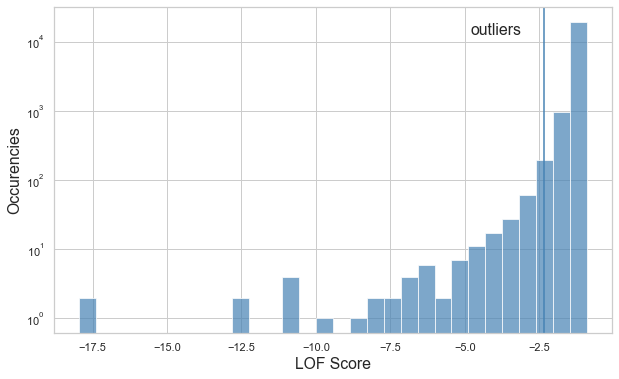

In [21]:
plt.figure(figsize = (10, 6))
plt.hist(clf.negative_outlier_factor_, bins = 30, alpha = 0.70, color = 'steelblue')
plt.axvline(-2.353, color = 'steelblue')
plt.text(-4.8, 12550, 'outliers', fontsize = 15.8)
plt.grid(True)
plt.yscale('log')
plt.ylabel('Occurencies', fontsize=15.8)
plt.xlabel('LOF Score', fontsize=15.8)
plt.show()

# ABOD

In [47]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.loci import LOCI
from pyod.models.auto_encoder import AutoEncoder

In [48]:
clf = ABOD(contamination=0.009106, method='fast', n_neighbors=11)
clf.fit(X)
outliers_ABOD = clf.predict(X)
print(np.unique(outliers_ABOD, return_counts=True)[1][1])

207


In [49]:
sorted(clf.decision_scores_)[:round(len(df) * 0.01)]

[-104571706865647.73,
 -79736147660671.86,
 -50054440378917.234,
 -44449016865904.05,
 -37818265225039.66,
 -37818265225039.66,
 -33281631461754.7,
 -33281631461754.7,
 -20209498075286.16,
 -20209498075286.16,
 -17959328156100.16,
 -15234779487655.273,
 -13966855179441.152,
 -13655429723407.94,
 -12845211809450.023,
 -12685911151165.525,
 -11048758779818.898,
 -10464825096693.752,
 -9793217856107.668,
 -9777934056210.727,
 -9777934056210.727,
 -9777934056210.727,
 -8633547826058.806,
 -8321462151990.159,
 -7571515421057.1,
 -7542022644440.8125,
 -7542022644440.8125,
 -7379762063584.4375,
 -7283872622781.61,
 -6213667480685.272,
 -5993076360790.354,
 -5938345405826.875,
 -5760818515881.204,
 -5408034830382.124,
 -5366289108294.143,
 -5366289108294.143,
 -5181429437114.945,
 -5112423198194.531,
 -4897488661842.218,
 -4121097137333.7085,
 -3971850744786.023,
 -3971850744786.023,
 -3920643654074.461,
 -3920643654074.461,
 -3837021431078.8237,
 -3791534606814.1377,
 -3632416278719.8843,
 -3

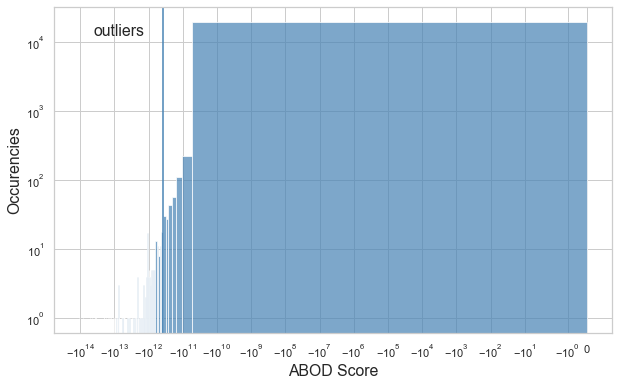

In [50]:
plt.figure(figsize = (10, 6))
plt.hist(clf.decision_scores_, bins=2000, color = 'steelblue', alpha = 0.70)
plt.axvline(-366331877838, color = 'steelblue')
plt.text(-40000000000000, 12550, 'outliers', fontsize = 15.8)
#plt.axvline(np.min(clf.decision_scores_[np.where(outliers_ABOD==1)]), c='k')
plt.yscale('log')
plt.xscale('symlog')
plt.grid(True)

plt.ylabel('Occurencies', fontsize = 15.8)
plt.xlabel('ABOD Score', fontsize = 15.8)
plt.show()

# OUTLIERS REPRESENTATION IN TIME DOMAIN

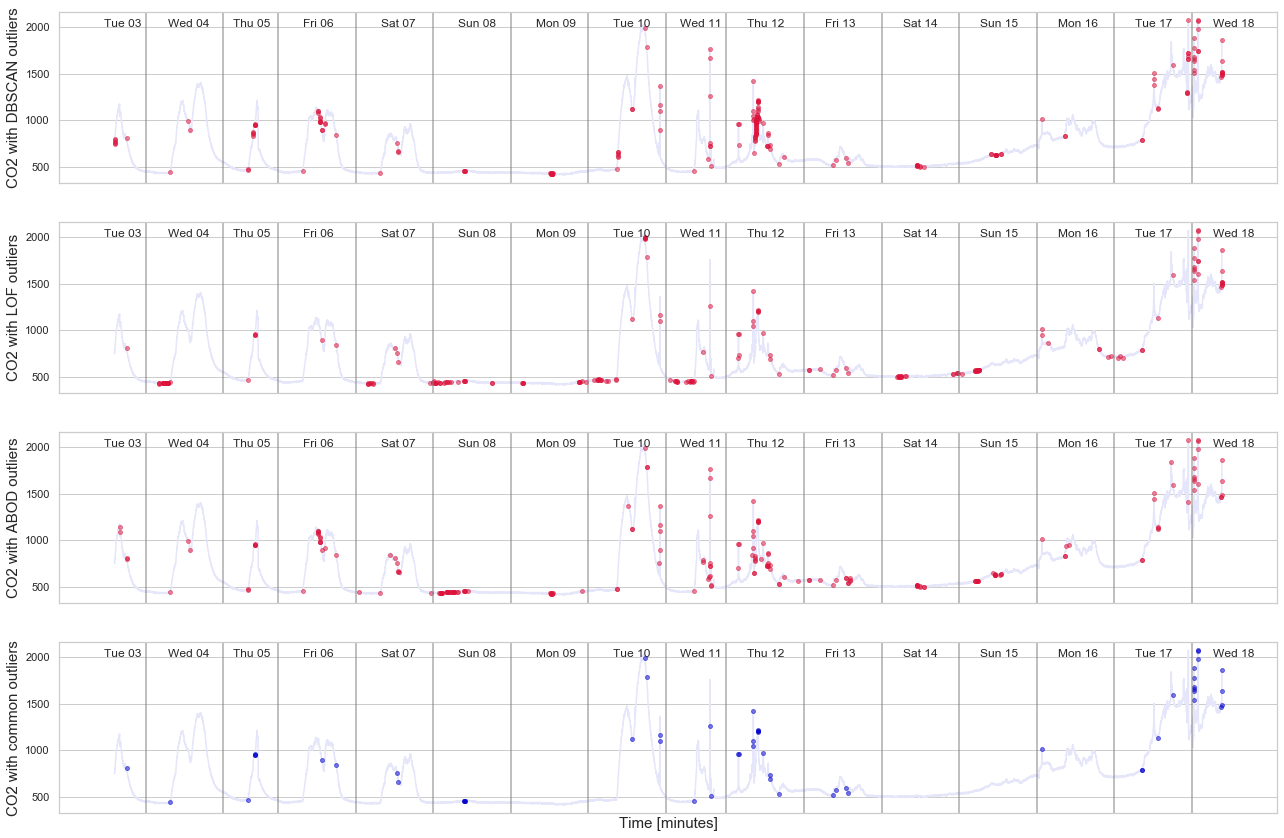

In [74]:
# per grafico con pca e outliers
outliers_dbscan = [1 if x==-1 else 0 for x in dbscan.labels_]

plt.figure(figsize=(18, 12))
 
plt.subplot2grid((4, 1), (0,0))
sns.lineplot(x=df.index, y=df['CO2'], color='lavender')
plt.ylabel("CO2 with DBSCAN outliers", fontsize = f)
# plot a point in correspondence of an outlier
for i, e in enumerate(outliers_dbscan):
    if e == 1:
        plt.plot(i, df['CO2'][i], marker='o', color='crimson', markersize=4, alpha=0.5)
        
#vertical lines to separate days
for i in change_date:
    plt.axvline(i, color = 'gray', alpha = 0.5, lw = 2)

# Name of the days
thu_05 = 2200
fri_06 = 3500
thu_12 = 11750
plt.text(-200 , 2000, 'Tue 03')
plt.text(1000 , 2000, 'Wed 04')
plt.text(thu_05 , 2000, 'Thu 05')
plt.text(fri_06 , 2000, 'Fri 06')
plt.text(fri_06 + (1440*1) , 2000, 'Sat 07')
plt.text(fri_06 + (1440*2) , 2000, 'Sun 08')
plt.text(fri_06 + (1440*3) , 2000, 'Mon 09')
plt.text(9250 , 2000, 'Tue 10')
plt.text(10500 , 2000, 'Wed 11')
plt.text(thu_12 , 2000, 'Thu 12')
plt.text(thu_12 + (1440*1) , 2000, 'Fri 13')
plt.text(thu_12 + (1440*2) , 2000, 'Sat 14')
plt.text(thu_12 + (1440*3) , 2000, 'Sun 15')
plt.text(thu_12 + (1440*4) , 2000, 'Mon 16')
plt.text(thu_12 + (1440*5) , 2000, 'Tue 17')
plt.text(thu_12 + (1440*6) , 2000, 'Wed 18')

plt.xticks([])
        
        
        
plt.subplot2grid((4, 1), (1,0))
sns.lineplot(x=df.index, y=df['CO2'], color='lavender')
plt.ylabel("CO2 with LOF outliers", fontsize = f)
# plot a point in correspondence of an outlier
for i, e in enumerate(outliers_LOF):
    if e == -1:
        plt.plot(i, df['CO2'][i], marker='o', color='crimson', markersize=4, alpha=0.5)
        
#vertical lines to separate days
for i in change_date:
    plt.axvline(i, color = 'gray', alpha = 0.5, lw = 2)

# Name of the days
thu_05 = 2200
fri_06 = 3500
thu_12 = 11750
plt.text(-200 , 2000, 'Tue 03')
plt.text(1000 , 2000, 'Wed 04')
plt.text(thu_05 , 2000, 'Thu 05')
plt.text(fri_06 , 2000, 'Fri 06')
plt.text(fri_06 + (1440*1) , 2000, 'Sat 07')
plt.text(fri_06 + (1440*2) , 2000, 'Sun 08')
plt.text(fri_06 + (1440*3) , 2000, 'Mon 09')
plt.text(9250 , 2000, 'Tue 10')
plt.text(10500 , 2000, 'Wed 11')
plt.text(thu_12 , 2000, 'Thu 12')
plt.text(thu_12 + (1440*1) , 2000, 'Fri 13')
plt.text(thu_12 + (1440*2) , 2000, 'Sat 14')
plt.text(thu_12 + (1440*3) , 2000, 'Sun 15')
plt.text(thu_12 + (1440*4) , 2000, 'Mon 16')
plt.text(thu_12 + (1440*5) , 2000, 'Tue 17')
plt.text(thu_12 + (1440*6) , 2000, 'Wed 18')

plt.xticks([])
        

plt.subplot2grid((4, 1), (2,0))
sns.lineplot(x=df.index, y=df['CO2'], color='lavender')
plt.ylabel("CO2 with ABOD outliers", fontsize = f)
# plot a point in correspondence of an outlier
for i, e in enumerate(outliers_ABOD):
    if e == 1:
        plt.plot(i, df['CO2'][i], marker='o', color='crimson', markersize=4, alpha=0.5)
        
#vertical lines to separate days
for i in change_date:
    plt.axvline(i, color = 'gray', alpha = 0.5, lw = 2)

# Name of the days
thu_05 = 2200
fri_06 = 3500
thu_12 = 11750
plt.text(-200 , 2000, 'Tue 03')
plt.text(1000 , 2000, 'Wed 04')
plt.text(thu_05 , 2000, 'Thu 05')
plt.text(fri_06 , 2000, 'Fri 06')
plt.text(fri_06 + (1440*1) , 2000, 'Sat 07')
plt.text(fri_06 + (1440*2) , 2000, 'Sun 08')
plt.text(fri_06 + (1440*3) , 2000, 'Mon 09')
plt.text(9250 , 2000, 'Tue 10')
plt.text(10500 , 2000, 'Wed 11')
plt.text(thu_12 , 2000, 'Thu 12')
plt.text(thu_12 + (1440*1) , 2000, 'Fri 13')
plt.text(thu_12 + (1440*2) , 2000, 'Sat 14')
plt.text(thu_12 + (1440*3) , 2000, 'Sun 15')
plt.text(thu_12 + (1440*4) , 2000, 'Mon 16')
plt.text(thu_12 + (1440*5) , 2000, 'Tue 17')
plt.text(thu_12 + (1440*6) , 2000, 'Wed 18')

plt.xticks([])

plt.subplot2grid((4, 1), (3, 0))
sns.lineplot(x=df.index, y=df['CO2'], color='lavender')
plt.ylabel("CO2 with common outliers", fontsize = f)

for i, e in enumerate(outliers_comuni):
    if e == 1:
        plt.plot(i, df['CO2'][i], marker='o', color='mediumblue', markersize=4, alpha=0.5)

        
#vertical lines to separate days
for i in change_date:
    plt.axvline(i, color = 'gray', alpha = 0.5, lw = 2)

# Name of the days
thu_05 = 2200
fri_06 = 3500
thu_12 = 11750
plt.text(-200 , 2000, 'Tue 03')
plt.text(1000 , 2000, 'Wed 04')
plt.text(thu_05 , 2000, 'Thu 05')
plt.text(fri_06 , 2000, 'Fri 06')
plt.text(fri_06 + (1440*1) , 2000, 'Sat 07')
plt.text(fri_06 + (1440*2) , 2000, 'Sun 08')
plt.text(fri_06 + (1440*3) , 2000, 'Mon 09')
plt.text(9250 , 2000, 'Tue 10')
plt.text(10500 , 2000, 'Wed 11')
plt.text(thu_12 , 2000, 'Thu 12')
plt.text(thu_12 + (1440*1) , 2000, 'Fri 13')
plt.text(thu_12 + (1440*2) , 2000, 'Sat 14')
plt.text(thu_12 + (1440*3) , 2000, 'Sun 15')
plt.text(thu_12 + (1440*4) , 2000, 'Mon 16')
plt.text(thu_12 + (1440*5) , 2000, 'Tue 17')
plt.text(thu_12 + (1440*6) , 2000, 'Wed 18')

plt.xticks([])


plt.xlabel('Time [minutes]', fontsize = 15)
plt.tight_layout()
plt.show()

# OUTLIERS REPRESENTATION IN PCA DOMAIN

In [52]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st

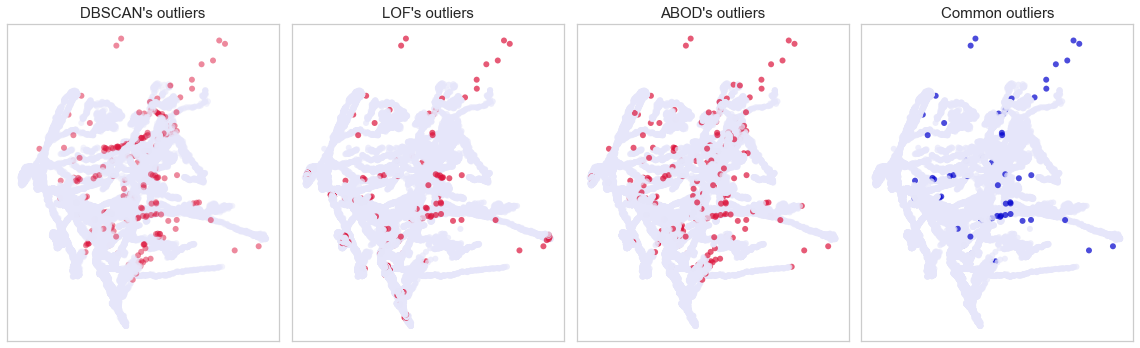

In [72]:
# per grafico con pca e outliers
outliers_dbscan = [1 if x==-1 else 0 for x in dbscan.labels_]
 
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
 
sns.set(style='whitegrid')
plt.figure(figsize=(16,5))
fig_dims = (1, 4)
f = 15
 
# outliers trovati da DBSCAN
plt.subplot2grid(fig_dims, (0,0))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue = outliers_dbscan, palette=["lavender", "crimson"], alpha=0.50, linewidth=0)
plt.title("DBSCAN's outliers", fontsize=f)
plt.xticks([])
plt.yticks([])
plt.legend().remove()
 
#outliers trovati da LOF
plt.subplot2grid(fig_dims, (0,1))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue = outliers_LOF, palette=["crimson", "lavender"], alpha=0.70, linewidth=0)
plt.title("LOF's outliers", fontsize=f)
plt.xticks([])
plt.yticks([])
plt.legend().remove()
 
#outliers trova ti da ABOD

plt.subplot2grid(fig_dims, (0,2))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue = outliers_ABOD, palette=["lavender", "crimson"], alpha=0.70, linewidth=0)
plt.title("ABOD's outliers", fontsize=f)
plt.xticks([])
plt.yticks([])
plt.legend().remove()

#OUTLIERS IN COMUNE
plt.subplot2grid(fig_dims, (0,3))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue = outliers_comuni, palette=["lavender", "mediumblue"], alpha=0.70, linewidth=0)
plt.title("Common outliers", fontsize=f)
plt.xticks([])
plt.yticks([])
plt.legend().remove()

 
plt.tight_layout()
plt.show()

In [54]:
print(np.unique(outliers_dbscan, return_counts=True))
print(np.unique(outliers_LOF, return_counts=True))
print(np.unique(outliers_ABOD, return_counts=True))

(array([0, 1]), array([20354,   206], dtype=int64))
(array([-1,  1]), array([  207, 20353], dtype=int64))
(array([0, 1]), array([20353,   207], dtype=int64))


In [55]:
outliers_LOF = [0 if x == 1 else 1 for x in outliers_LOF]
print(np.unique(outliers_dbscan, return_counts=True))
print(np.unique(outliers_LOF, return_counts=True))
print(np.unique(outliers_ABOD, return_counts=True))

(array([0, 1]), array([20354,   206], dtype=int64))
(array([0, 1]), array([20353,   207], dtype=int64))
(array([0, 1]), array([20353,   207], dtype=int64))


# Outliers in comune

In [58]:
outliers_comuni = []
i = 0
for i in range(len(outliers_LOF)):
    if(outliers_dbscan[i] == outliers_LOF[i] and outliers_dbscan[i] == outliers_ABOD[i] and outliers_dbscan[i] == 1):
        outliers_comuni.append(outliers_dbscan[i])
        #print(outliers_dbscan[i], outliers_LOF[i], outliers_ABOD[i])
    else:
        outliers_comuni.append(0)
print(np.unique(outliers_comuni, return_counts=True))

(array([0, 1]), array([20503,    57], dtype=int64))


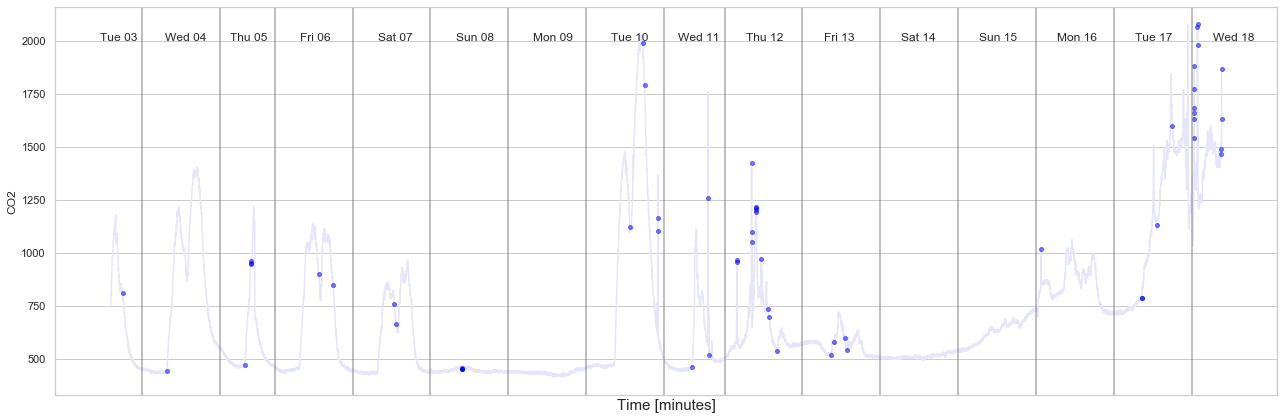

In [59]:
plt.figure(figsize=(18, 6))
 
sns.lineplot(x=df.index, y=df['CO2'], color='lavender')

for i, e in enumerate(outliers_comuni):
    if e == 1:
        plt.plot(i, df['CO2'][i], marker='o', color='blue', markersize=4, alpha=0.5)
        
#vertical lines to separate days
for i in change_date:
    plt.axvline(i, color = 'gray', alpha = 0.5, lw = 2)

# Name of the days
thu_05 = 2200
fri_06 = 3500
thu_12 = 11750
plt.text(-200 , 2000, 'Tue 03')
plt.text(1000 , 2000, 'Wed 04')
plt.text(thu_05 , 2000, 'Thu 05')
plt.text(fri_06 , 2000, 'Fri 06')
plt.text(fri_06 + (1440*1) , 2000, 'Sat 07')
plt.text(fri_06 + (1440*2) , 2000, 'Sun 08')
plt.text(fri_06 + (1440*3) , 2000, 'Mon 09')
plt.text(9250 , 2000, 'Tue 10')
plt.text(10500 , 2000, 'Wed 11')
plt.text(thu_12 , 2000, 'Thu 12')
plt.text(thu_12 + (1440*1) , 2000, 'Fri 13')
plt.text(thu_12 + (1440*2) , 2000, 'Sat 14')
plt.text(thu_12 + (1440*3) , 2000, 'Sun 15')
plt.text(thu_12 + (1440*4) , 2000, 'Mon 16')
plt.text(thu_12 + (1440*5) , 2000, 'Tue 17')
plt.text(thu_12 + (1440*6) , 2000, 'Wed 18')

plt.xticks([])
        
plt.xlabel('Time [minutes]', fontsize = 15)
plt.tight_layout()
plt.show()